# Examen Segundo Parcial
Nombres: 
*Christopher Rodriguez*
Bryan Antamba

In [38]:
# Your imports HERE !!!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

## 01 - Anotaciones - 1 pt

El diccionario `players` contiene el nombre y la estatura de los miembros de un equipo de la NBA. Hacer un gráfico de línea donde el eje x sea una enumeración (una entrada por jugador, es decir, su posición en la lista de nombres), el eje y la estatura, y que contenga anotaciones de flecha donde se indique el jugador más alto y el más bajo. El texto de las anotaciones es el nombre del jugador correspondiente.

Posible resultado:

<img src="nba_heights.png">

In [13]:
players = {
    "Nombre": ["LeBron James", "Anthony Davis", "D'Angelo Russell", "Austin Reaves", "Jarred Vanderbilt", "Jaxson Hayes", "Rui Hachimura", "Spencer Dinwiddie", "Christian Wood", "Gabe Vincent", "Max Christie", "Cam Reddish"],
    "Estatura": [2.06, 2.08, 1.93, 1.96, 2.03, 2.11, 2.03, 1.96, 2.08, 1.91, 1.96, 2.01]
}

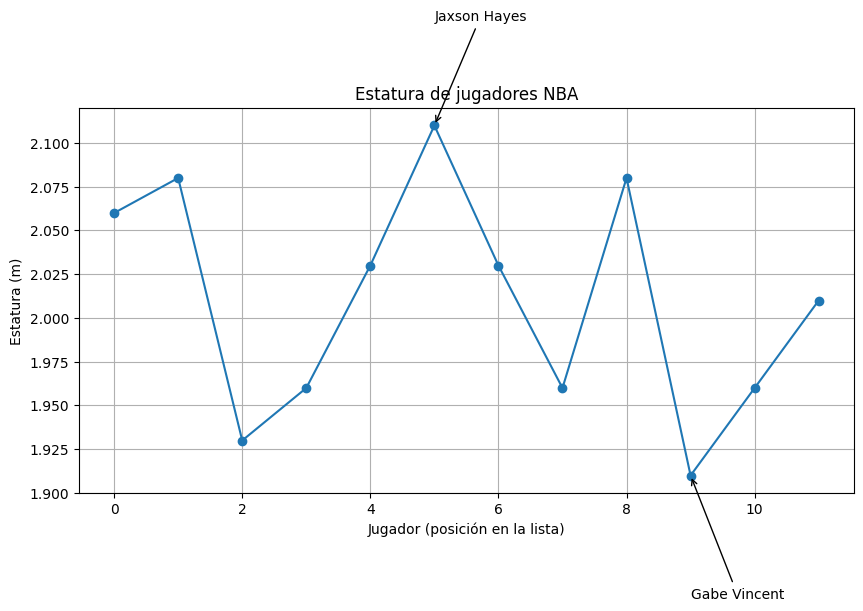

In [37]:
# Your solution HERE !!!!
#Ids jugadores
import matplotlib.pyplot as plt

# Diccionario dado
players = {
    "Nombre": [
        "LeBron James", "Anthony Davis", "D'Angelo Russell", "Austin Reaves",
        "Jarred Vanderbilt", "Jaxson Hayes", "Rui Hachimura",
        "Spencer Dinwiddie", "Christian Wood", "Gabe Vincent",
        "Max Christie", "Cam Reddish"
    ],
    "Estatura": [2.06, 2.08, 1.93, 1.96, 2.03, 2.11, 2.03, 1.96, 2.08, 1.91, 1.96, 2.01]
}

# Eje x 
x = list(range(len(players["Nombre"])))
y = players["Estatura"]

# Creamos la figura 
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o')
plt.xlabel("Jugador (posición en la lista)")
plt.ylabel("Estatura (m)")
plt.title("Estatura de jugadores NBA")

# Encontrar el más alto y el más bajo
max_height = max(y)
min_height = min(y)

idx_max = y.index(max_height)
idx_min = y.index(min_height)

# Anotación jugador más alto
plt.annotate(
    players["Nombre"][idx_max],
    xy=(idx_max, max_height),
    xytext=(idx_max, max_height + 0.06),
    arrowprops=dict(arrowstyle="->")
)

# Anotación jugador más bajo
plt.annotate(
    players["Nombre"][idx_min],
    xy=(idx_min, min_height),
    xytext=(idx_min, min_height - 0.07),
    arrowprops=dict(arrowstyle="->")
)

plt.grid(True)
plt.show()




## 02 - En varias líneas - 1 pt

A continuación se presenta la función lambda `oneline_function`. Hacer una función `readable_function` que haga exactamente lo mismo, pero que el código se escriba de forma legible y utilizando estructuras de control clásicas.

In [46]:
# Your solution HERE !!!!
import random

def readable_function(i):
    total = 0
    
    for n in range(i):
        if n % 2 == 0:
            value = random.randint(1, 20)
        else:
            value = random.randint(-20, -1)
        
        total += value
    
    return total


            
    

In [47]:
# Test Use Case
import random

iterations = 20
oneline_function = lambda i: sum([random.randint(1,20) if n%2 == 0 else random.randint(-20,-1) for n in range(i)])

random.seed(7788)
expected_output = oneline_function(iterations) # This calls the lambda function named oneline_function

random.seed(7788)
output = readable_function(iterations) # This calls your function named readable_function

print(expected_output)
print(output)

assert(expected_output == output) # This will fail if the data is wrong

-9
-9


## 03 - Volvamos al Titanic - 2 pts

Junto con este examen se ha proporcionado el fichero *"titanic2.csv"*. Asegúrate que este fichero esté en el mismo directorio que este Notebook. También se ha proporcionado el generador `passengers` que hemos visto en clase donde cada llamada te devuelve un diccionario con los datos de cada pasajero. Formando un pipeline de generadores.

Ahora, tienes que crear una función, usando dicho generador que construya un nuevo dataframe con el porcentaje de supervivientes (key = `Survived`) por clase (key = `Pclass`).

In [45]:
# Your solution HERE !!!!
#leemos el archivo 


def calc_percent_survived(passengers):
    # Diccionarios para contar pasajeros y supervivientes por clase
    total = {}
    survived = {}
 # Cuenta el total de pasajeros por clase
    for p in passengers:
        c = int(p["Pclass"])
 # Cuenta los supervivientes por clase
        total[c] = total.get(c, 0) + 1
        survived[c] = survived.get(c, 0) + int(p["Survived"])
#DataFrame de salida
    return pd.DataFrame({
        "PClass": sorted(total),
        "PercentSurvived": [
            round(survived[c] / total[c] * 100) for c in sorted(total)
        ]
    })






In [36]:
# Generator Pipeline
file_name = "./titanic2.csv"
lines = (line for line in open(file_name))
list_line = (s.rstrip().split("|") for s in lines)
cols = next(list_line)
passengers = (dict(zip(cols, data)) for data in list_line)

# Test Use Case
expected_output = pd.DataFrame({"PClass":[1,2,3], "PercentSurvived" :[62, 47, 24]})

output = calc_percent_survived(passengers) # This calls your function named calc_percent_survived

display(expected_output)
display(output)



,PClass,PercentSurvived
0,1,62
1,2,47
2,3,24


,PClass,PercentSurvived
0,1,63
1,2,47
2,3,24


## 04 - División de datos - 2 pts

Volver a cargar el fichero *"titanic2.csv"* en un dataframe. Queremos clasificar todos los pasajeros en 5 grupos por edad: `E1`, `E2`, `E3`, `E4`, `E5`. Asegurarse de que **cada grupo tenga aproximadamente la misma cantidad de pasajeros**. Si algún pasajero no tiene registrada la edad, eliminar su respectiva fila del dataframe.

Crear la columna `AgeGroup` con la etiqueta del grupo al que pertenece cada pasajero.

Finalmente, dividir los pasajeros en varios dataframes por `AgeGroup` y guardar esta vista en sus ficheros correspondientes *"E1.csv"*, *"E2.csv"*, *"E3.csv"*, *"E4.csv"*, *"E5.csv"*.

Asegurarse de que tanto el fichero original *"titanic2.csv"*, como los ficheros *"EX_expected.csv"*, estén en el mismo directorio del Notebook. Igualmente, crear en  este mismo directorio los ficheros *"EX.csv"* 

In [ ]:
# Your solution HERE !!!!




    

In [ ]:
# Test Use Case
groups = ["E1", "E2", "E3", "E4", "E5"]
file_name = "./titanic2.csv"

split_dataframe(file_name, groups)  # This calls your function named split_dataframe

for group in groups:
    df_created = pd.read_csv(f"{group}.csv", sep='|', index_col=0, engine='python')
    df_expected = pd.read_csv(f"{group}_expected.csv", sep='|', index_col=0, engine='python')
    
    print(f"################################### Group {group} ###################################")
          
    display(df_created.head(2))
    display(df_expected.head(2))
          
    assert(df_expected.equals(df_created)) # This will fail if any of the files is not as expected

## 05 - Analizando datos - 4 pts

Cargar nuevamente el fichero *"titanic2.csv"* en un dataframe, pero esta vez crear una función `read_clean_df(file_name)` donde sólo tomemos las columnas **Pclass**, **Age**, **Relatives** y **Fare**. La columna **Relatives** no está en el dataset original y se debe crear a partir de la suma de las columnas **SibSp** (número de hermanos que viajaan con el pasajero), **Parch** (número de padres o hijos que viajaban con el pasajero). **Relatives** será la columna con el total de familiares cercanos que viajaban con el pasajero.

Además, crear una función `verify_corr(df,target)` cuyas entradas sean un dataframe `df` y el nombre de la columna `target` a la que se quiere estudiar la correlación. La función devuelve un diccionario donde las claves (keys) sean las columnas de `df` excluyendo `target`, y los valores sean un booleano que indique si hay alguna correlación aparente con `target` (valor absoluto mayor a 0.3).

Finalmente, crear un generador `divide_by_uniques(df, column)` que divida el dataframe `df` en dataframes resumidos según los valores únicos en la columna `column`. Ejemplo: La columna **Pclass** tiene tres valores únicos, por lo que el generador `divide_by_uniques(df, column)` devolverá sequencialmente tres dataframes con las filas filtradas por cada uno de estos tres valores.

**Hint:** Este ejercicio está basado en la hipótesis de que el precio del ticket por persona tiende a bajar cuando compras en "paquetes familiares". Al principio la hipótesis parece falsa porque el precio está más relacionado con la clase **Pclass**, sin embargo, una vez que "normalizamos" respecto a esta columna con fuerte correlación, la hipótesis parece ser cierta.

In [ ]:
# Your solution HERE !!!!

In [5]:
# Test Use Case
file_name = "titanic2.csv"

df_small = read_clean_df(file_name)    # This calls your function named read_clean_df

output = verify_corr(df_small, "Fare")   # This calls your function named verify_corr
expected_output = {'Pclass': True, 'Age': False, 'Relatives': False}

print(expected_output)
print(output)

assert(expected_output == output)  # This will fail if correlations for the three columns are not as expected

gen_uniques = divide_by_uniques(df_small, "Pclass")  # This calls your function named divide_by_uniques

for df_class in gen_uniques:
    output = verify_corr(df_class, "Fare")  # This calls your function named verify_corr
    expected_output = {'Age': False, 'Relatives': True}
    
    print(output)
    print(expected_output)
    
    assert(expected_output == output)  # This will fail if correlations for the two columns are not as expected for every PClass

NameError: name 'read_clean_df' is not defined